### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

from torch import utils
from torchvision import datasets
from torchvision import transforms

### Constants and definitions

In [2]:
%matplotlib inline

BATCH_SIZE = 64
DATA_FOLDER = '../data/CelebA/'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
IMAGE_SIZE = 64

### Data loading

Load entire dataset:

In [3]:
dataset = datasets.ImageFolder(root=DATA_FOLDER,
                               transform = transforms.Compose([
                                   transforms.Resize(IMAGE_SIZE),
                                   transforms.CenterCrop(IMAGE_SIZE),
                                   transforms.ToTensor(),
                                   transforms.Normalize((.5, .5, .5), (.5, .5, .5))
                               ]))

Split into training and test sets:

In [4]:
# get entire dataset size
dataset_size = len(dataset)

# get train and test sets sizes
train_size = int(dataset_size * 0.99)
test_size = dataset_size - train_size

# split train and test sets
train_set, test_set = utils.data.random_split(dataset, (train_size, test_size))

# report
print(f'CelebA size: {dataset_size} images\n'
      f'Training set size: {train_size} images\n'
      f'Test set size: {test_size} images')

CelebA size: 202599 images
Training set size: 200573 images
Test set size: 2026 images


Create data loaders:

In [5]:
train_loader = utils.data.DataLoader(train_set, batch_size = BATCH_SIZE, shuffle = True)
test_loader = utils.data.DataLoader(test_set, batch_size = BATCH_SIZE * 2, shuffle = False)

Visualize:

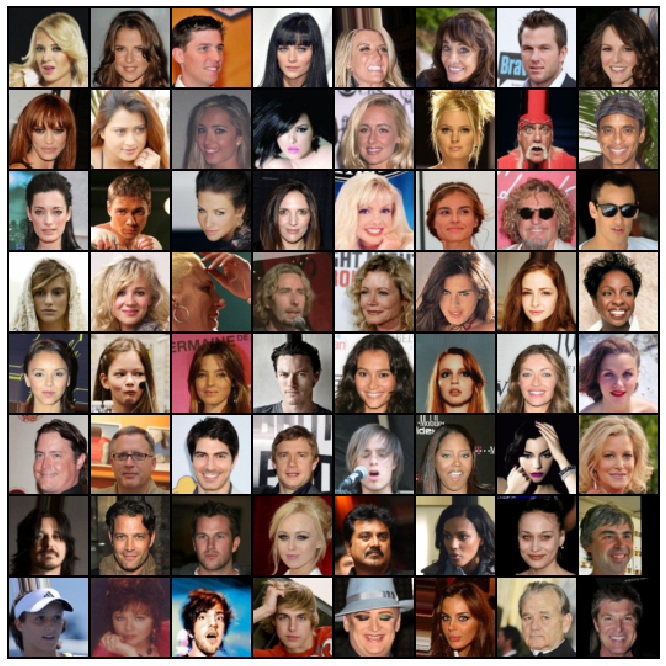

In [6]:
# get sample batch
sample = next(iter(train_loader))

# create image grid
grid = torchvision.utils.make_grid(sample[0].to('cpu')[:64], padding = 2, normalize = True)

# plot
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(np.transpose(grid, (1, 2, 0)))